In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## Regresión lineal de mínimos cuadrados

* Ajustamos la pendiente e intercepción de modo que el ajuste de regresión lineal minimice la suma de los residuos (desplazamientos verticales o distancias).

<img src="RL1.png" width="400" />

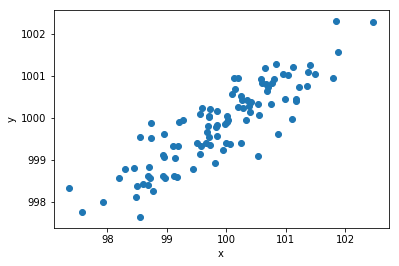

In [2]:
rng = np.random.RandomState(123)
mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]
muestra = rng.multivariate_normal(mean, cov, size=100)
x, y = muestra[:, 0], muestra[:, 1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

* Calculamos los coeficiente de correlación de Pearson

In [3]:
np.corrcoef(np.vstack([x, y]))

array([[ 1.        ,  0.87552229],
       [ 0.87552229,  1.        ]])

###  Regresión lineal de mínimos cuadrados usando conceptos estadísticos

$w_1 = \frac{\sigma_{x,y}}{\sigma_{x}^{2}}$

$b = \bar{y} - w_1\bar{x}$

donde :


$\text{covarianza: } \sigma_{xy} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$

$\text{varianza: } \sigma^{2}_{x} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

In [4]:
cov_xy = np.cov(np.vstack((x, y)), ddof=0)[0, 1]
var_x = np.var(x, ddof=0)
w1 = cov_xy / var_x
b = np.mean(y) - w1*np.mean(x)

print('pendiente: %.2f' % w1)
print('Intercepcion y: %.2f' % b)

pendiente: 0.84
Intercepcion y: 915.59


###  Regresión lineal de mínimos cuadrados usando álgebra lineal

* Solución : $w = (X^T X)^{-1} X^T y$

In [5]:
X = x[:, np.newaxis]

# Agregando una columnas de 1's
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])

z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
b, w1 = w[0], w[1]
print('Pendiente: %.2f' % w1)
print('Intercepcion y: %.2f' % b)

Pendiente: 0.84
Intercepcion y: 915.59


### Uso de una función pre implementada

* Hay varias herramientas para manejar estos problemas:

    - [statsmodels.regression.linear_model.OLS](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).
    - [Ordinary Least Squares and Ridge Regression Variance](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html).

In [6]:
w = np.polyfit(x, y, deg=1)
b, w1 = w[1], w[0]
print('Pendiente: %.2f' % w1)
print('Intercepcion y: %.2f' % b)

Pendiente: 0.84
Intercepcion y: 915.59


### Muestra de la línea de ajuste

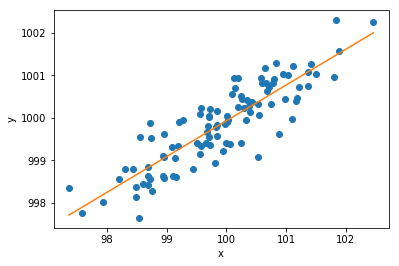

In [7]:
extremos = np.array([np.min(x), np.max(x)])
prediccion = extremos*w1 + b

plt.plot(x, y, marker='o', linestyle='')
plt.plot(extremos, prediccion)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Evaluación

####  Error cuadrado medio  (MSE) : 

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y_i}\big)^2$$

* El MSE es dependiente de la escala.

In [8]:
y_prediccion = x*w1 + b
mse = np.mean((y - y_prediccion)**2)
mse

0.21920128791623694

In [9]:
rmse = np.sqrt(mse)
rmse

0.46818937185313908

### Residuos

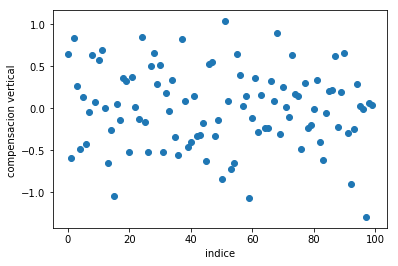

In [10]:
plt.scatter(np.arange(x.shape[0]), y - y_prediccion)
plt.ylabel('compensacion vertical ')
plt.xlabel('indice')

### Coeficientes de determinación


* Suma total de cuadrados (variabilidad de la respuesta de la variable objetivo, proporcional a la varianza):
    
    $$SS_{total} = \sum_{i=1}^{n} \big( y_i - \bar{y_i} \big)^2$$
    
* Suma residual de cuadrados:

    $$SS_{residual} = \sum_{i=1}^{n} \big( \hat{y_i} - \bar{y_i} \big)^2$$

* Coeficiente de determinación:

    $$R^2 = \frac{SS_{residual}}{SS_{total}}$$

In [11]:
media_y = np.mean(y)
SS_total = np.sum((y - media_y)**2)
SS_residual = np.sum((y_prediccion - media_y)**2)
r_2 = SS_residual / SS_total
r_2

0.76653928492769419

* Normalmente, el coeficiente de determinación se puede calcular elevando al cuadrado el coeficiente de correlación de Pearson:

In [12]:
pendiente, intercepcion, r_valor, p_valor, std_err = scipy.stats.linregress(x, y)
r_valor**2

0.76653928492765233

* Se debe tener en cuenta que si el modelo encaja peor que una línea horizontal, el coeficiente de determinación puede ser negativo (por lo que no siempre se recomienda siempre usar un coeficiente cuadrado de Pearson para calcular $ R^2 $).